# Analyzing Swiss Large Cap Companies - SOLUTIONS
In this notebook we investigate data from the largest 100 publicly traded companies in Switzerland. The data is from: https://www.tradingview.com/markets/stocks-switzerland/market-movers-large-cap/. It has been extracted on September 20, 2024 and preprocessed in the separate notebook (named `large_caps_CH_PREP.ipynb`; which we will look at in the last block). The cleaned version of the dataset is available as comma-separated values in the file `large_caps_CH_2024-09-20.csv`. We will discuss techniques to prepare data for analysis in the last block; for now we just use the cleaned version of the data set.

## Preparations
Before we can start, we need to import a number of python libraries that we will be using in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Avoid unnecessary warnings:
pd.options.mode.chained_assignment = None 

## Data Loading
Using the function `read_csv` fron the `pandas` library, we can load the content of a file with comma-separated values into Python. It will be stored in the format of a **DataFrame**, which offers some nice functionality. For now, we limit ourselves to shares with a positive earnings per share (EPS) as well as a positive dividend yield:

In [4]:
largeCaps = pd.read_csv('large_caps_CH_2024-09-20.csv')
largeCaps = largeCaps.loc[(largeCaps['DivYield_Prct']>0) & (largeCaps['EPS_CHF']>0)]

In a jupyter notebook, data frames can be displayed nicely by just typing in their names. 

In [5]:
largeCaps

,Symbol,Name,Sector,MarketCap_BCHF,SharePrice_CHF,Volume_Shares,EPS_CHF,DivYield_Prct,Revenue_BCHF,RevenueGrowth_Prct,GrossProfit_BCHF,OperatingIncome_BCHF,EBITDA_BCHF,EnterpriseValue_BCHF
0,ABBN,ABB LTD N,Producer manufacturing,87.895,48.04,5170000,1.82,1.81,28.737000,-1.63,10.459000,4.298000,5.004000,91.528
2,ADEN,ADECCO N,Commercial services,4.673,28.16,1223000,1.75,8.88,22.848000,-4.56,4.563000,0.572978,0.817024,7.762
4,ALC,ALCON N,Health technology,41.195,82.44,1118000,1.97,0.29,8.472000,-0.07,4.722000,1.258000,2.337000,44.536
5,ALLN,ALLREAL N,Finance,2.580,156.80,114804,5.34,4.46,0.428300,-22.54,0.226300,0.174800,0.177000,5.338
6,ALSN,ALSO N,Distribution services,3.468,270.50,13034,8.83,1.77,9.673000,-27.78,0.374323,0.196606,0.239944,3.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,VZN,VZ HOLDING N,Finance,5.021,127.80,54437,5.13,1.75,0.519748,32.56,0.465102,0.218927,0.242019,3.857
96,WKBN,WALLISER KB N,Finance,1.792,114.00,956,5.79,3.38,0.391776,48.84,NaN,0.108627,NaN,5.158
97,YPSN,YPSOMED HLDG,Health technology,5.745,421.50,11299,5.74,0.47,0.548457,17.99,0.189054,0.081063,0.155929,5.927
98,ZUGER,ZUGER KB N,Finance,2.417,8400.00,41,424.52,2.62,0.470132,84.16,NaN,0.136650,NaN,4.111


Note that if you are working directly on a console, you have to use a `print` statement, such as `print(largeCap_df)`, but the output is not as nice:

In [6]:
print(largeCaps)

   Symbol                Name                  Sector  MarketCap_BCHF  \
0    ABBN           ABB LTD N  Producer manufacturing          87.895   
2    ADEN            ADECCO N     Commercial services           4.673   
4     ALC             ALCON N       Health technology          41.195   
5    ALLN           ALLREAL N                 Finance           2.580   
6    ALSN              ALSO N   Distribution services           3.468   
..    ...                 ...                     ...             ...   
95    VZN        VZ HOLDING N                 Finance           5.021   
96   WKBN       WALLISER KB N                 Finance           1.792   
97   YPSN        YPSOMED HLDG       Health technology           5.745   
98  ZUGER          ZUGER KB N                 Finance           2.417   
99   ZURN  ZURICH INSURANCE N                 Finance          73.438   

    SharePrice_CHF  Volume_Shares  EPS_CHF  DivYield_Prct  Revenue_BCHF  \
0            48.04        5170000     1.82      

## An Overview over the Data
To get an overview of the data, all `pandas` DataFrames have two generic methods: 

* `info()` displays information about the size of the data frame (number of rows and columns), as well as the names, types and available non-empty values for each attribute (or column)
* `describe()` gives an overview (in the form of a number of summary statistics) of the numeric column. Columns that are not numeric are dropped for this.

In [7]:
largeCaps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                92 non-null     object 
 1   Name                  92 non-null     object 
 2   Sector                92 non-null     object 
 3   MarketCap_BCHF        92 non-null     float64
 4   SharePrice_CHF        92 non-null     float64
 5   Volume_Shares         92 non-null     int64  
 6   EPS_CHF               92 non-null     float64
 7   DivYield_Prct         92 non-null     float64
 8   Revenue_BCHF          90 non-null     float64
 9   RevenueGrowth_Prct    90 non-null     float64
 10  GrossProfit_BCHF      68 non-null     float64
 11  OperatingIncome_BCHF  90 non-null     float64
 12  EBITDA_BCHF           68 non-null     float64
 13  EnterpriseValue_BCHF  92 non-null     float64
dtypes: float64(10), int64(1), object(3)
memory usage: 10.8+ KB


In [8]:
largeCaps.describe()

,MarketCap_BCHF,SharePrice_CHF,Volume_Shares,EPS_CHF,DivYield_Prct,Revenue_BCHF,RevenueGrowth_Prct,GrossProfit_BCHF,OperatingIncome_BCHF,EBITDA_BCHF,EnterpriseValue_BCHF
count,92.000000,92.000000,9.200000e+01,92.000000,92.000000,90.000000,90.000000,68.000000,90.000000,68.000000,92.000000
mean,18.407130,1583.319674,7.570048e+05,50.185217,2.781848,8.013067,14.608778,3.238112,1.014132,1.721495,22.922033
std,39.331479,10991.322882,2.576662e+06,307.436702,1.506946,15.401142,37.079268,8.192271,2.956972,4.031152,49.162116
min,1.235000,11.300000,4.100000e+01,0.100000,0.290000,0.231530,-87.210000,0.105128,-8.889000,0.037153,-0.397310
25%,2.331500,77.950000,1.556625e+04,3.347500,1.747500,0.858589,-2.932500,0.275806,0.137173,0.191099,2.755250
50%,4.629000,142.500000,9.166350e+04,6.570000,2.585000,2.300500,7.840000,0.545114,0.273013,0.388604,5.843000
75%,15.895250,400.650000,3.421472e+05,14.187500,3.662500,7.644750,29.115000,2.051250,0.682586,1.116500,18.539000
max,217.538000,105400.000000,1.774100e+07,2932.500000,8.880000,92.998000,226.650000,42.898000,16.349000,19.823000,271.071000


Additionally, the function `value_counts()` can be called for each column of a DataFrame. It counts the number of times each value occurs, and lists them in decreasing number of occurence. This makes sinse in particular for non-numeric attributes, e.g., the `Sector` attribute of the large cap companies:

In [9]:
largeCaps['Sector'].value_counts()

Sector
Finance                   29
Producer manufacturing    16
Health technology         14
Consumer non-durables      6
Electronic technology      6
Distribution services      4
Utilities                  3
Process industries         3
Commercial services        2
Consumer durables          2
Transportation             2
Retail trade               1
Non-energy minerals        1
Communications             1
Technology services        1
Consumer services          1
Name: count, dtype: int64

## Visualisations
The above analysis gives a summary over the numeric and categorical values. Next, we will show some visualisations, aiming at a better understanding of the data and potential dependencies between various attributes of the shares.

### Visualising a Single Dimension
A standard way to plot one simple dimension is the so-called *boxplot*, which can easily be plotted using the `boxplot` function from `matplotlib.pyplot`:

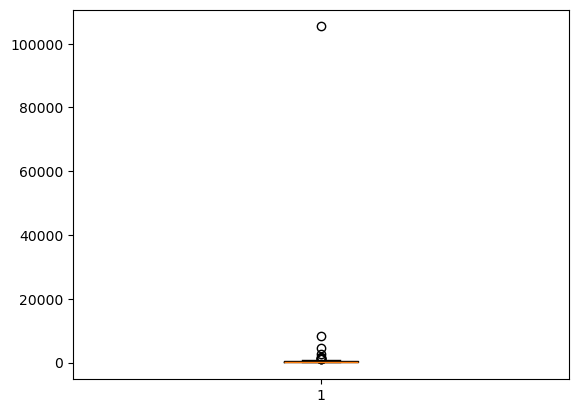

In [10]:
plt.boxplot(largeCaps['SharePrice_CHF'])
plt.show()

We already see that one share has a way higher price than all the others. As the plot is automatically scaled such that all shares fit, we see very little of the other shares. Therefore, we limit ourselves to shares with a price below 20'000 CHF, and plot them again.

What we do here is so-called *logical indexing*, i.e., we look at all the rows for which the indicated condition (in our example: `largeCaps['SharePrice_CHF']` is below `20_000`), and we store these into a new variable, called `largeCaps_b20k`. Note that in python, we can use the underscore `_` to make numbers more readable; it has no impact in Python.

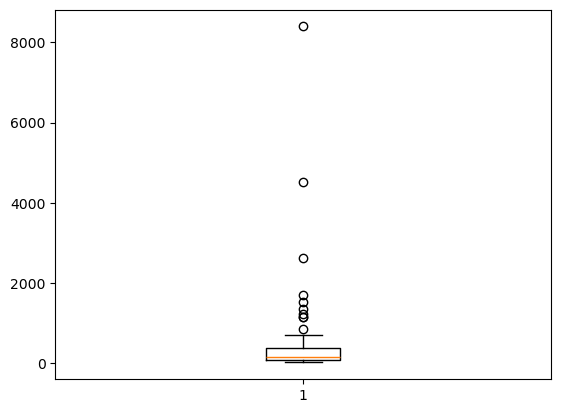

In [11]:
largeCaps_b20k = largeCaps.loc[largeCaps['SharePrice_CHF']<20_000, ]
plt.boxplot(largeCaps_b20k['SharePrice_CHF'])
plt.show()

Again, we have one share which has a much higher price than all the others. We limit ourselves further and look only at companies with share price below 5000 CHF.

In [12]:
largeCaps_b5k = largeCaps.loc[largeCaps['SharePrice_CHF']<5_000, ]

Now the boxplot gives a better overview:

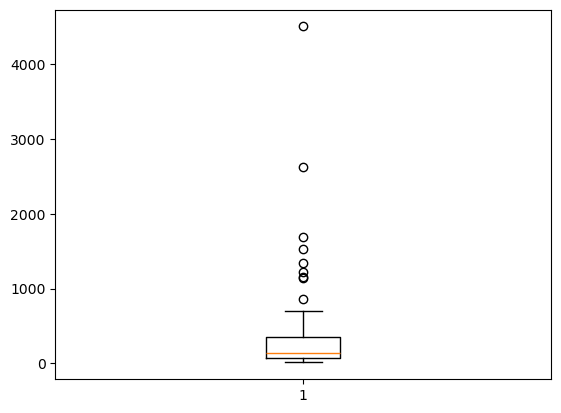

In [13]:
plt.boxplot(largeCaps_b5k['SharePrice_CHF'])
plt.show()

A further common plot type is the so-called histogram. For this, the values (usually on the x-axis) are placed into bins, and then the number of items (or rows - companies, in our case), per bin is counted:

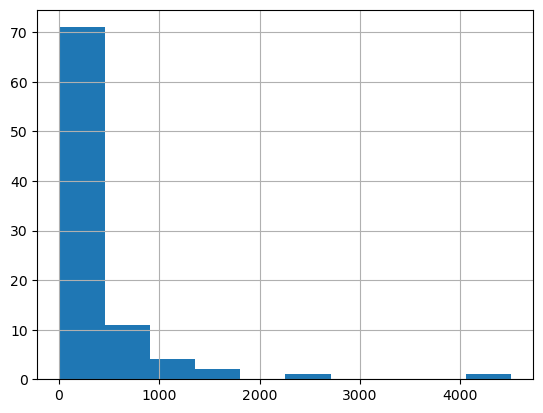

In [14]:
plt.hist(data=largeCaps_b5k, x="SharePrice_CHF")
plt.grid()
plt.show()

Looking under the hood, we see that the function has created a specific data structure, which contains the bin limits (as second element) and the number of items per bin (as first element):

(array([71., 11.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  11.3 ,  460.77,  910.24, 1359.71, 1809.18, 2258.65, 2708.12,
        3157.59, 3607.06, 4056.53, 4506.  ]),
 <BarContainer object of 10 artists>)

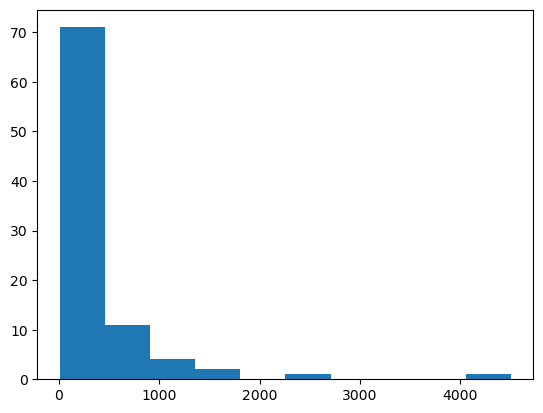

In [15]:
plt.hist(data=largeCaps_b5k, x="SharePrice_CHF")

We can also increase the number of bins (or explicitly specify the bin limits) - see the documentation for details:

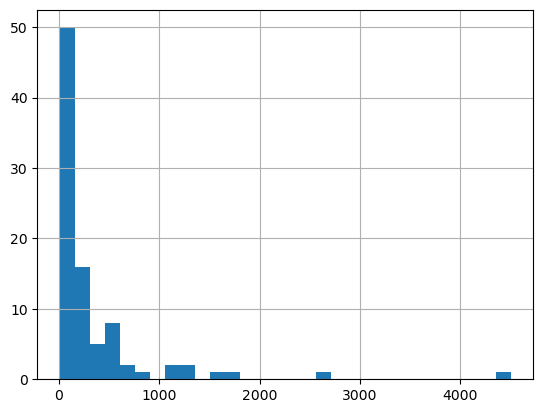

In [16]:
plt.hist(data=largeCaps_b5k, x="SharePrice_CHF", bins=30)
plt.grid()
plt.show()

Alternatively, we can also define the bins manually. With the function `linspace` from the `numpy` package, we get equally spaced bins:

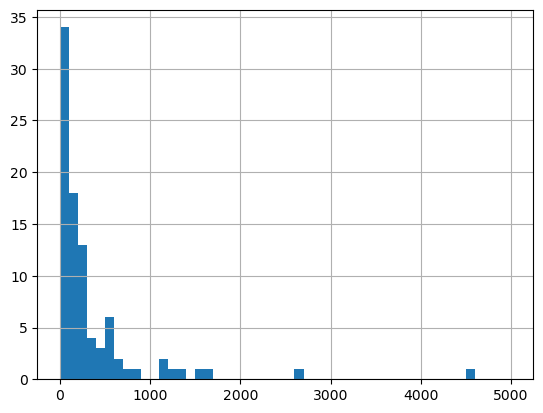

In [17]:
plt.hist(data=largeCaps_b5k, x="SharePrice_CHF", bins=np.linspace(0, 5000, 51))
plt.grid()
plt.show()

A further possibility (mainly helpful if there are many points, or if you want to compare different groups) are so-called *density plots*. In `seaborn`, we can get them using the function `kdeplot` (where `kde` *stands for kernel density estimation*, which you can roughtly think of a smoothed version of a histogram). A limitation of this type of plot is that it might get too smooth.

`seaborn` builds up on top of `matplotlib` and allows us to provide a data frame and then indicate which columns should be used for which axis (and for other plot attributes):

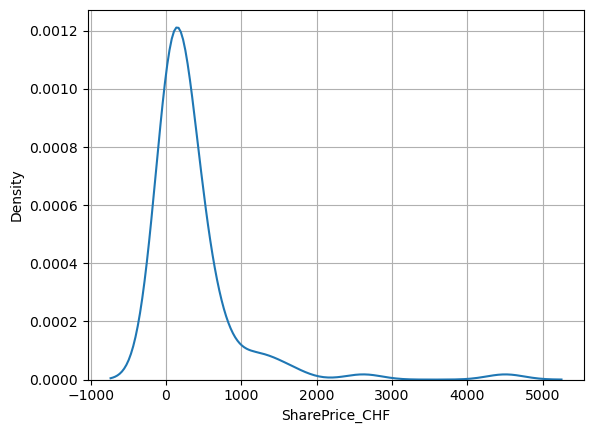

In [18]:
sns.kdeplot(data=largeCaps_b5k, x="SharePrice_CHF")
plt.grid()
plt.show()

This image already shows a potential issue with the smoothed density plots: A negative share price does not make sense, but we see that the smoothing leads to a positive density for negative share prices.

### Visualising Two Dimensions
To add some more details, we can visualize more than one attribute in the same plot. For example, we can plot a box plot of the share price *per industry sector*. To do so, we will use `boxplot` from the library `seaborn`:

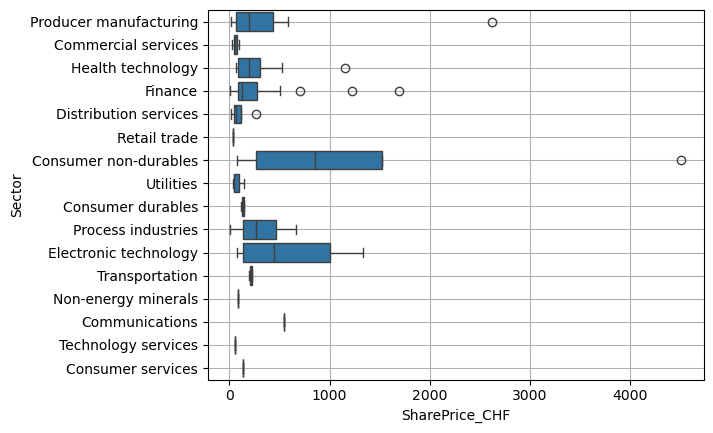

In [19]:
sns.boxplot(data=largeCaps_b5k, x="SharePrice_CHF", y="Sector")
plt.grid()
plt.show()

Another very common plot type to visualize two dimensions are the so-called *scatter plots*, which we will use often also in this class. A coordinate system is built up from the two attributes, and each data point (in our case: each share) is plotted at the respective position:

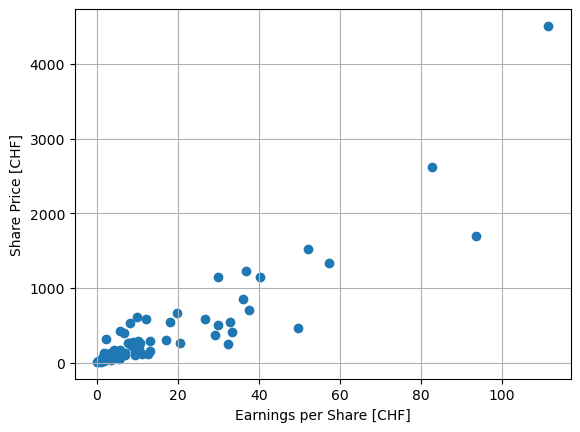

In [20]:
plt.scatter(x=largeCaps_b5k['EPS_CHF'], y=largeCaps_b5k['SharePrice_CHF']);
plt.xlabel('Earnings per Share [CHF]')
plt.ylabel('Share Price [CHF]')
plt.grid()
plt.show()

### Visualising more than Two Dimensions
Visualising more than two dimensions is tricky. An extension of the scatterplot into 3D is of course possible, but often hard to actually read.

An alternative is the use of color (or the plot symbol) to encode additional information. For example, we can enrich the above scatterplot of *earnings per share* vs *share price* with the sector encoded as color. Again, we use the `seaborn` library, which offers a simple interface to do so:

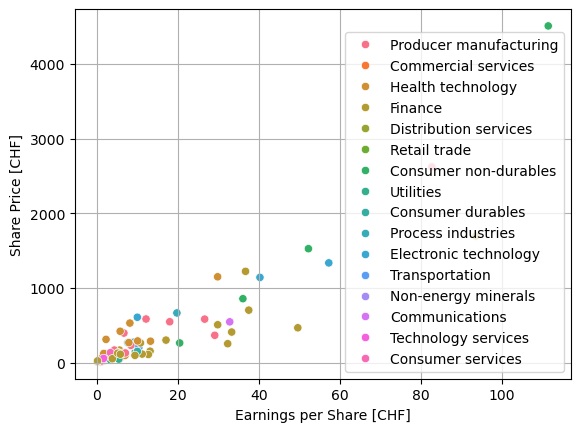

In [21]:
sns.scatterplot(data=largeCaps_b5k, x='EPS_CHF', y='SharePrice_CHF', hue='Sector')
plt.xlabel('Earnings per Share [CHF]')
plt.ylabel('Share Price [CHF]')
plt.legend()
plt.grid()
plt.show()

This looks colorful, but is hard to read due to the many sectors. To illustrate this plot with a more helpful example, we limit ourselves to the three sectors with the most companies (see above). We again store these companies in a new dataset:

In [22]:
largeCaps_b5k_largeSectors = largeCaps_b5k.loc[largeCaps_b5k['Sector'].isin([ 'Finance', 'Producer manufacturing', 'Health technology' ])]
largeCaps_b5k_largeSectors

,Symbol,Name,Sector,MarketCap_BCHF,SharePrice_CHF,Volume_Shares,EPS_CHF,DivYield_Prct,Revenue_BCHF,RevenueGrowth_Prct,GrossProfit_BCHF,OperatingIncome_BCHF,EBITDA_BCHF,EnterpriseValue_BCHF
0,ABBN,ABB LTD N,Producer manufacturing,87.895,48.04,5170000,1.82,1.81,28.737000,-1.63,10.459000,4.298000,5.004000,91.528000
4,ALC,ALCON N,Health technology,41.195,82.44,1118000,1.97,0.29,8.472000,-0.07,4.722000,1.258000,2.337000,44.536000
5,ALLN,ALLREAL N,Finance,2.580,156.80,114804,5.34,4.46,0.428300,-22.54,0.226300,0.174800,0.177000,5.338000
9,BAER,JULIUS BAER N,Finance,9.585,48.60,999142,1.82,5.35,5.824000,28.59,NaN,0.513600,NaN,8.700000
10,BALN,BALOISE N,Finance,7.644,169.30,280805,5.59,4.55,9.539000,-5.66,NaN,0.381200,NaN,10.185000
11,BANB,BACHEM N,Health technology,5.347,71.30,134265,1.51,1.12,0.577316,14.72,0.176963,0.128562,0.165918,5.174000
13,BCGE,BC GENEVE N,Finance,1.805,255.00,2031,32.30,2.55,0.801344,71.07,NaN,0.253532,NaN,3.214000
14,BCHN,BURCKHARDT N,Producer manufacturing,1.980,584.00,11192,26.61,2.65,0.981963,50.91,0.262063,0.115971,0.134891,2.043000
15,BCVN,BC VAUD N,Finance,7.474,87.05,149014,5.24,4.94,1.597000,44.54,NaN,0.541500,NaN,12.943000
16,BEAN,BELIMO N,Producer manufacturing,7.201,585.50,45442,12.13,1.45,0.883955,10.91,0.251819,0.160769,0.196724,7.144000


Now we do the same plot again:

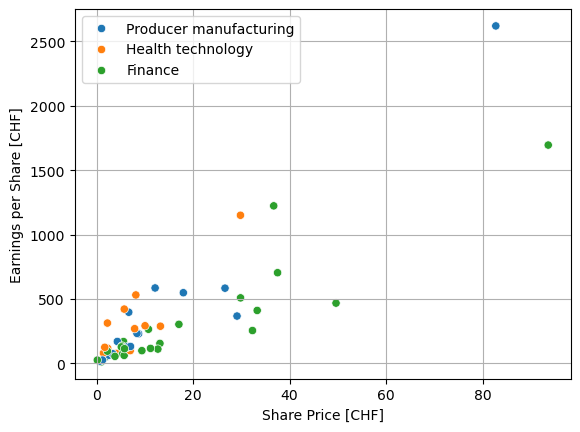

In [23]:
sns.scatterplot(data=largeCaps_b5k_largeSectors, x='EPS_CHF', y='SharePrice_CHF', hue='Sector')
plt.xlabel('Share Price [CHF]')
plt.ylabel('Earnings per Share [CHF]')
plt.legend()
plt.grid()
plt.show()

Another way to show several dimensions is to create pairwise histograms for every combination of two dimensions. This is done by the `pairwise` function:

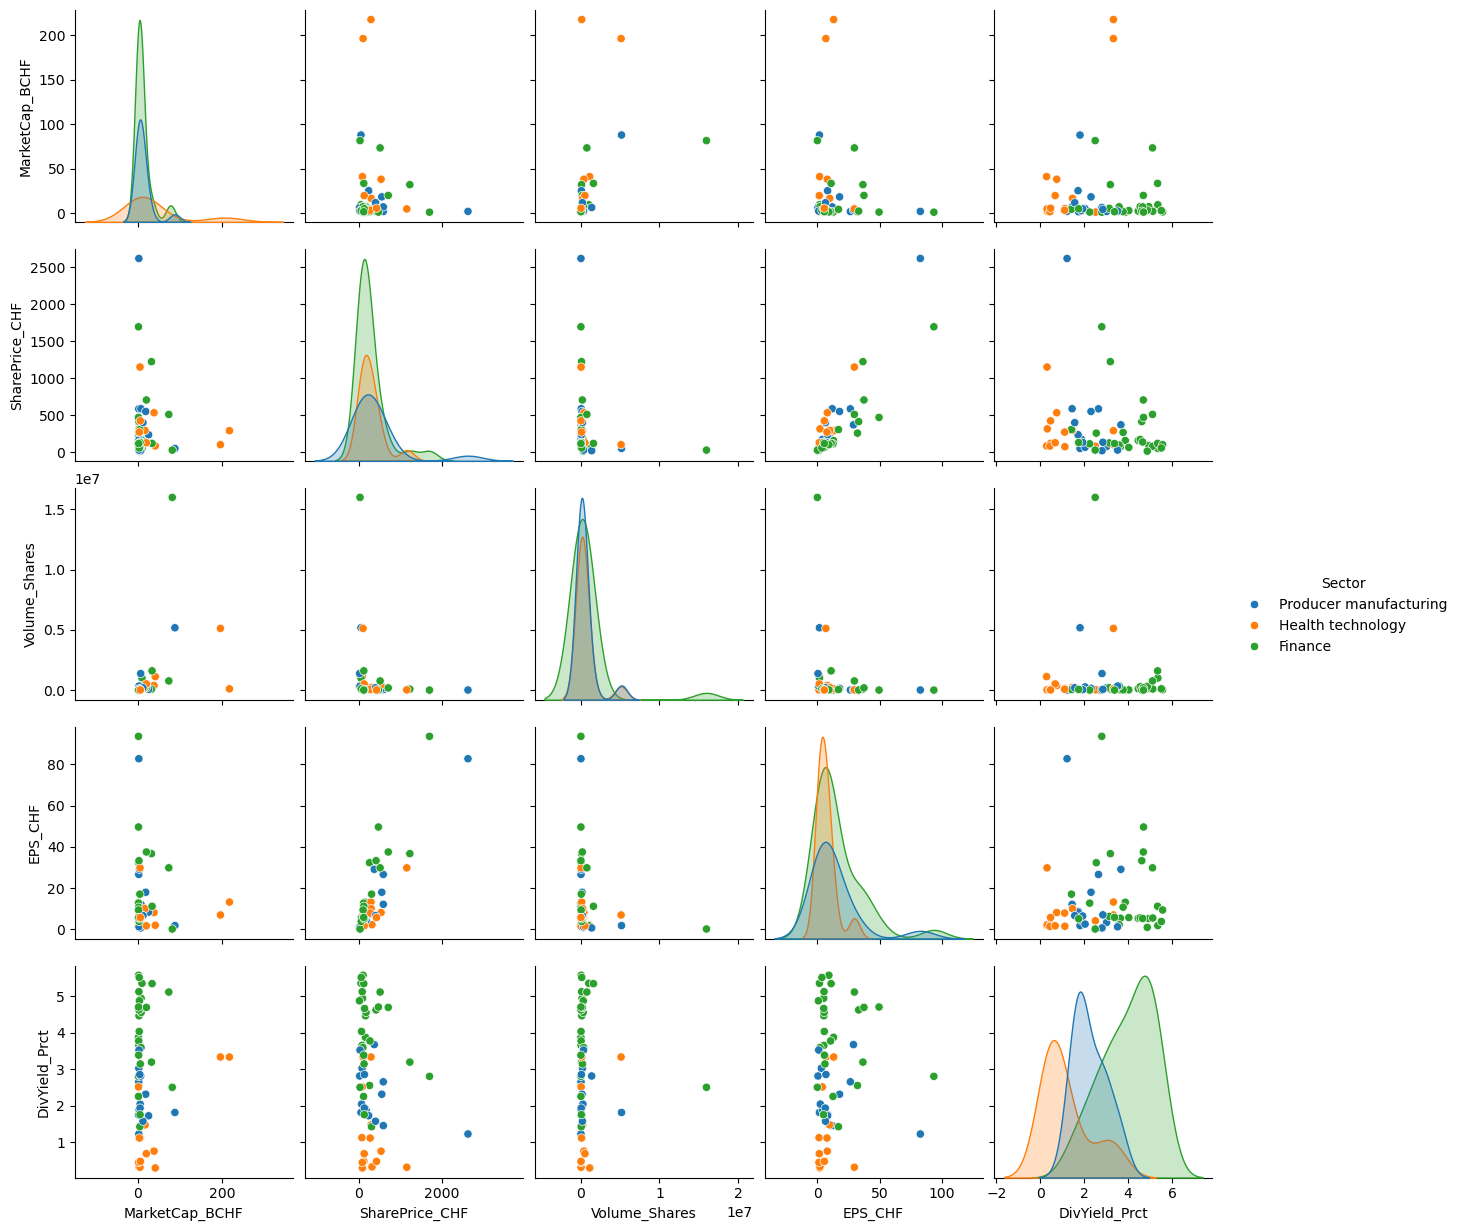

In [24]:
sns.pairplot(largeCaps_b5k_largeSectors[['MarketCap_BCHF', 'SharePrice_CHF', 'Volume_Shares', 'EPS_CHF', 'DivYield_Prct', 'Sector']], hue='Sector')

With too many dimensions, however, also this plot becomes very hard to read - and takes time to render. You can try it out below if you don't mind to wait a few moments:

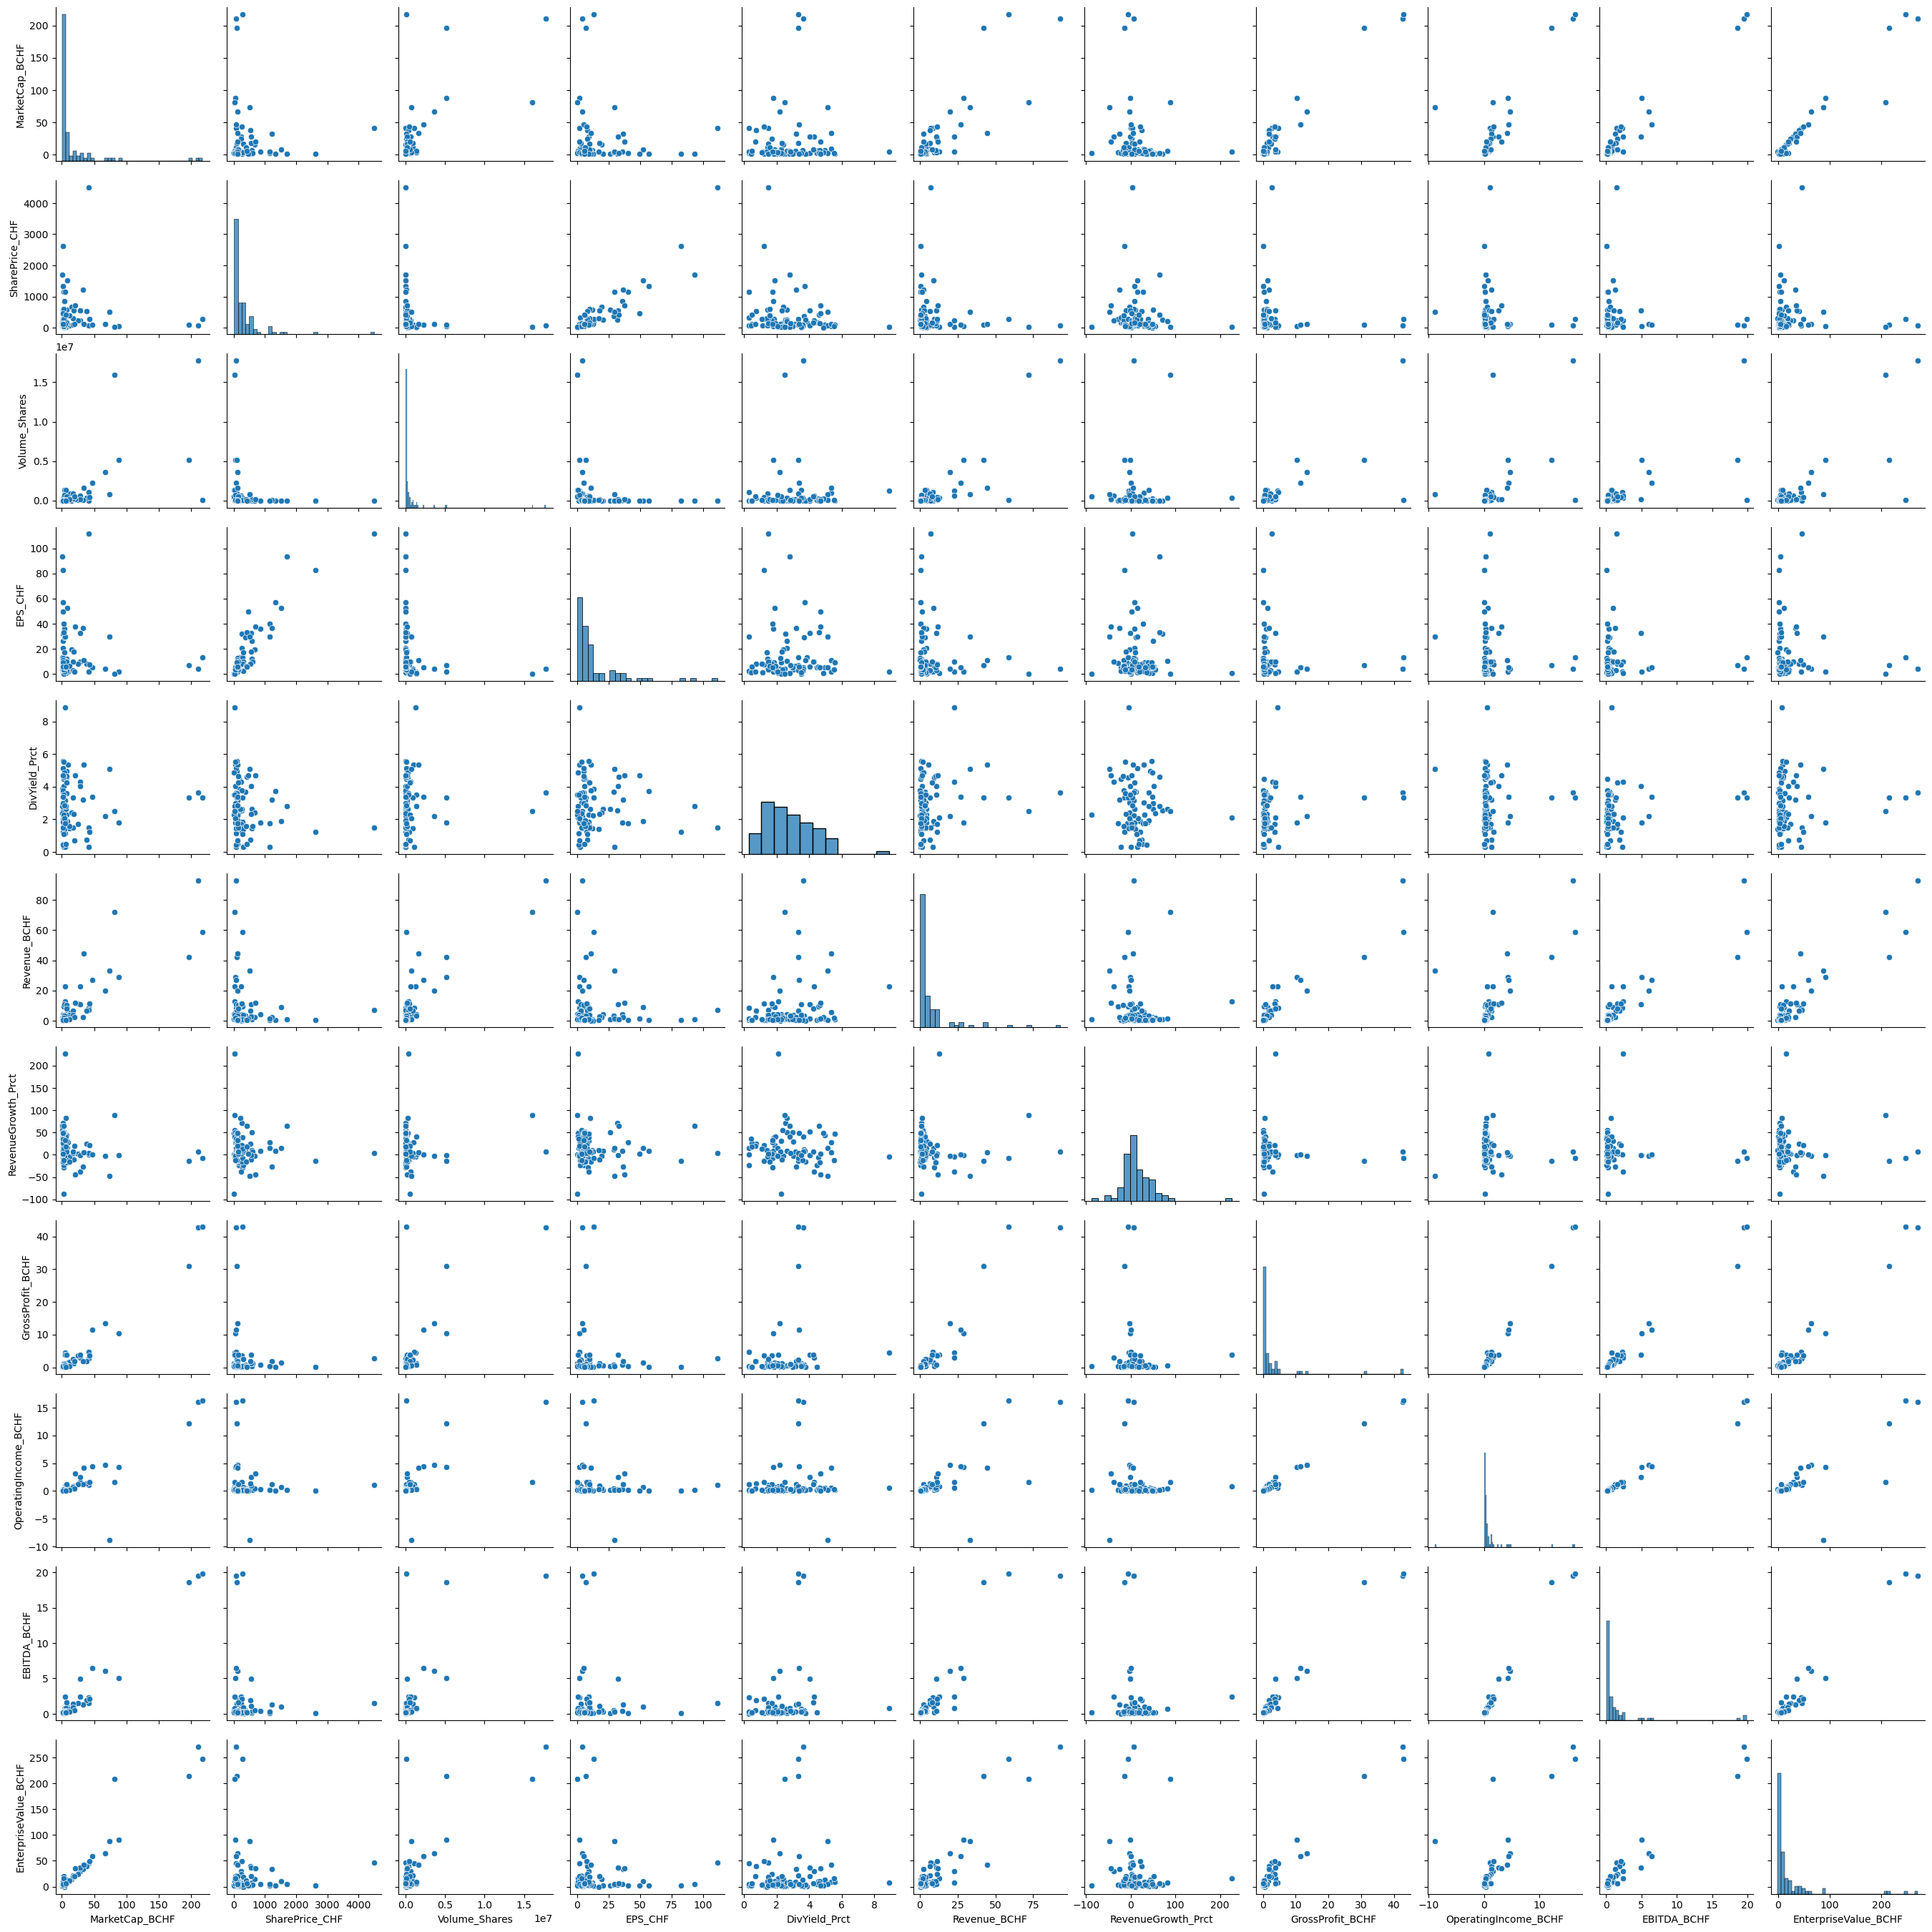

In [25]:
sns.pairplot(largeCaps_b5k)

## Visualising Correlation
Korrelation is a prime statistical measure for the linear dependency between two variables. For any two variables, it lies in the range -1 to 1.

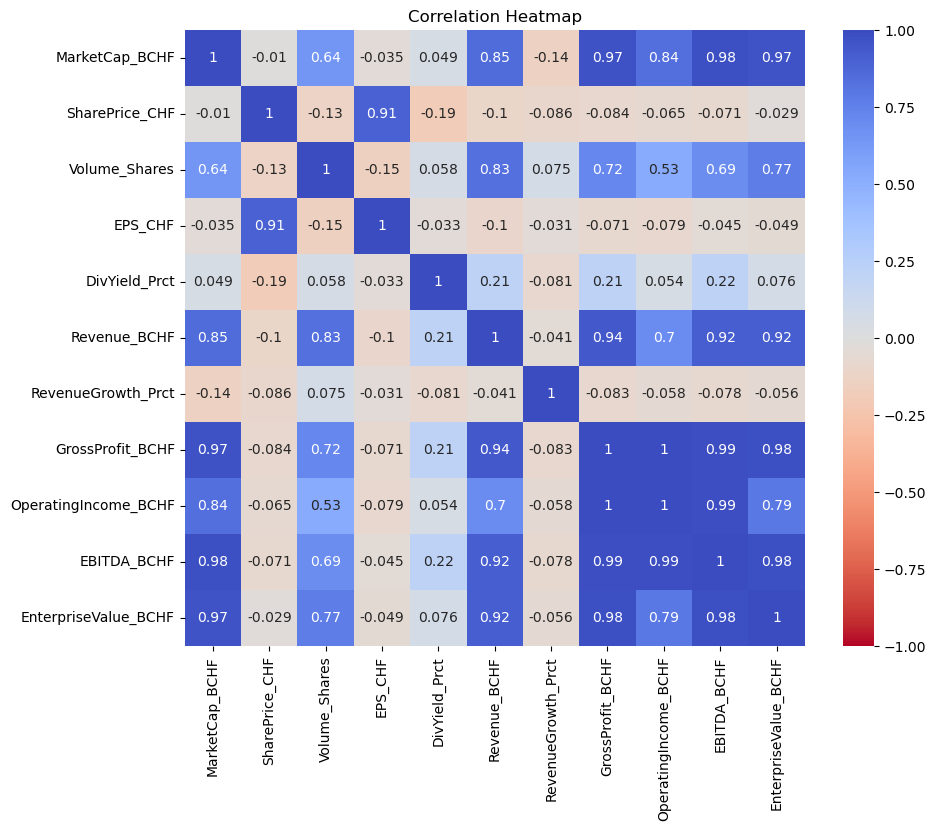

In [26]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(largeCaps_b5k.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm_r")
heatmap.set_title('Correlation Heatmap');

If we are interested in the share price `SharePrice_CHF`, the correlation matrix shows us that the earnings per share `EPS_CHF`, the Dividend Yield `DivYield_Prct`, and the Volume of the Shares traded on a given day `Volume_Shares` show the largest absolute correlation. Therefore, let's investigate this in more detail. To do so, we will make some scatter plots:

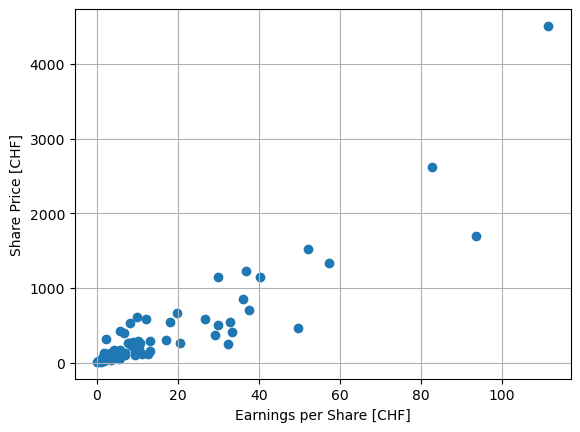

In [27]:
plt.scatter(x=largeCaps_b5k['EPS_CHF'], y=largeCaps_b5k['SharePrice_CHF']);
plt.xlabel('Earnings per Share [CHF]')
plt.ylabel('Share Price [CHF]')
plt.grid()
plt.show()

**EXERCISE**: Continue similarly to find out about other dependencies. If you need inspiration, look at the correlation matrix and identify some attributes that might have an influence of the share price.

**SOLUTION**: From the correlation heatmap, we seee that the Volume of the Shares traded on a given day, `Volume_Shares`, and the Dividend Yield in % (`DivYield_Prct`) each seem to be negatively correlated with the `SharePrice_CHF`. To get the corresponding scatterplots, we just need to replace the column name for the x axis, as well as the label of the x axis:

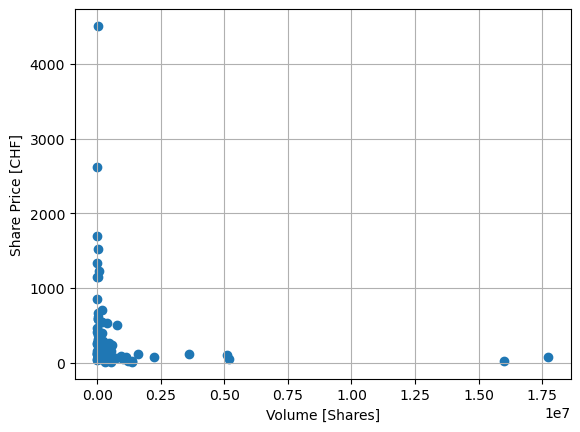

In [28]:
plt.scatter(x=largeCaps_b5k['Volume_Shares'], y=largeCaps_b5k['SharePrice_CHF']);
plt.xlabel('Volume [Shares]')
plt.ylabel('Share Price [CHF]')
plt.grid()
plt.show()

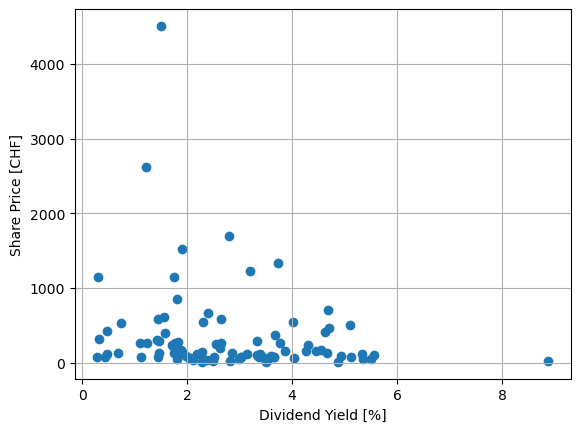

In [29]:
plt.scatter(x=largeCaps_b5k['DivYield_Prct'], y=largeCaps_b5k['SharePrice_CHF']);
plt.xlabel('Dividend Yield [%]')
plt.ylabel('Share Price [CHF]')
plt.grid()
plt.show()

**(END OF SOLUTION)**

## Formalizing and Evaluating a Linear Dependency Hypothesis
The scatterplot above (and the correlation heatmap) might give rise to the hypothesis that the higher the earnings per share, the higher the share price is. We now formalize the assumption as a linear model, using the `scikit-learn` class `LinearRegression`.

First, we define which columns of our dataframe we want to use as `X` and `y` values:

In [30]:
X = largeCaps_b5k[['EPS_CHF']]
y = largeCaps_b5k[['SharePrice_CHF']]

Next, we get a linear model (from `sklearn.linear_model`) and adapt it to the selected data. This processs is called **fitting** or **training**:

In [31]:
linreg_sp_vs_eps = LinearRegression()
linreg_sp_vs_eps.fit(X, y)

LinearRegression()

After calling `fit(...)`, the model is now adapted to our data. We can access the parameters (coefficient and intercept) that have been learned:

In [32]:
print('Coefficient: ')
print(linreg_sp_vs_eps.coef_)
print('Intercept:')
print(linreg_sp_vs_eps.intercept_)

Coefficient: 
[[27.76793607]]
Intercept:
[-34.69716456]


The `seaborn` library offers the function `lmplot` to plot the data together with the linear model, including the confidence region:

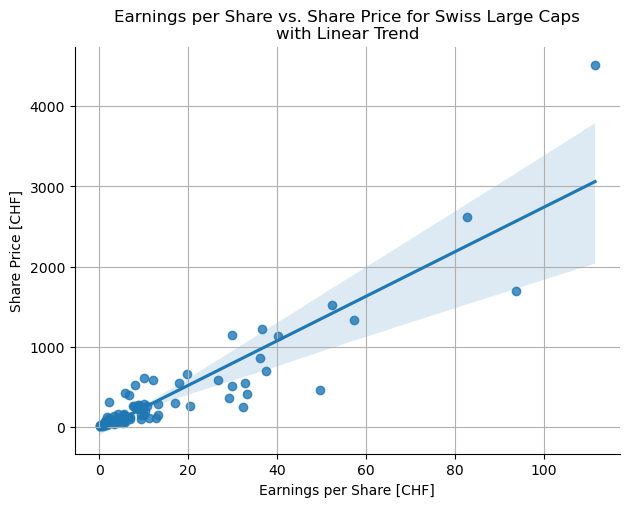

In [33]:
sns.lmplot(data=largeCaps_b5k,
           x='EPS_CHF', y='SharePrice_CHF', height=4.8, aspect=4/3)
plt.xlabel('Earnings per Share [CHF]')
plt.ylabel('Share Price [CHF]')
plt.title('Earnings per Share vs. Share Price for Swiss Large Caps\nwith Linear Trend')
plt.grid()

`scikit-learn` also implements a series of quality metrics as ready-made functions

In [34]:
y_pred = linreg_sp_vs_eps.predict(X)
print('r2-Score: ' + str(r2_score(y, y_pred)))
print('MSE: ' + str(mean_squared_error(y, y_pred)))
print('RMSE: ' + str(root_mean_squared_error(y, y_pred)))

r2-Score: 0.8197738839964354
MSE: 66619.38239803193
RMSE: 258.1073079128755


As we will be applying and evaluating several models, we pack this into a function. Besides the printing, the function will also create a new data frame containing the same quality metrics as columns:

In [35]:
def apply_eval_model(model, data, y_true, model_name=''):
    y_pred = model.predict(data)
    print('r2-Score: ' + str(r2_score(y_true, y_pred)))
    print('MSE: ' + str(mean_squared_error(y_true, y_pred)))
    print('RMSE: ' + str(root_mean_squared_error(y_true, y_pred)))
    if len(model_name)>0:
        df = pd.DataFrame({'model_name': model_name,
                           'r2_score': r2_score(y_true, y_pred),
                           'MSE': mean_squared_error(y_true, y_pred),
                           'RMS': root_mean_squared_error(y_true, y_pred)},
                          index=[model_name])
        return df

Let us try this function:

In [36]:
model_perf_sp_vs_eps = apply_eval_model(linreg_sp_vs_eps, X, y, 'EPS')

r2-Score: 0.8197738839964354
MSE: 66619.38239803193
RMSE: 258.1073079128755


In [37]:
model_perf_sp_vs_eps

,model_name,r2_score,MSE,RMS
EPS,EPS,0.819774,66619.382398,258.107308


## Evaluation on New Data
In order to find out how the shares were developing, we have collected the same data one week later, i.e., on September 27. It is stored in the same format. As above, we limit ourselves to shares with a positive earnings per share (EPS) as well as a positive dividend yield. We will mark all variables related to the later data set by ´_val´ to indicate this is based on the later data we use to validate our models.

In [38]:
largeCaps_val = pd.read_csv('large_caps_CH_2024-09-27.csv').dropna() # erase records (=companies) with missing values
largeCaps_val = largeCaps_val.loc[(largeCaps_val['DivYield_Prct']>0) & (largeCaps_val['EPS_CHF']>0)]
largeCaps_val_b5k = largeCaps_val[ largeCaps_val['SharePrice_CHF'] < 5_000 ]

Now, using the `apply_eval_model` function we have defined above, we can easily evaluate our model on the new data:

In [39]:
model_perf_val_sp_vs_eps = apply_eval_model(linreg_sp_vs_eps, largeCaps_val_b5k[['EPS_CHF']],
                                          largeCaps_val_b5k[['SharePrice_CHF']], 'EPS')

r2-Score: 0.8701469699146999
MSE: 57666.9250085938
RMSE: 240.13938662492205


**EXERCISE**: Define and evaluate a few other models. Use the above example as guidance.

We recommend you store the data frames containing the model performance in a somewhat descriptive variable name, as we did for `model_perf_val_sp_vs_eps`. 

**SOLUTION**: Below are two examples of models. We use the two next most correlated attributes with the share price. You might of course have defined another model. If so, feel free to ask a teaching assistant to double-check your model.

Also, in the interest of space, we have put all the code into a single cell. Also, we do not define the variables `X` and `y`, but directly use the respective columns from the dataframe:

In [40]:
## A linear Model to Predict the Share Price from Dividend Yield
# Model definition:
linreg_sp_vs_dy = LinearRegression()

# Model Fitting:
linreg_sp_vs_dy.fit(largeCaps_b5k[['DivYield_Prct']], largeCaps_b5k[['SharePrice_CHF']])

# Evaluation on Training Data:
print('Performance on Training Data:')
model_perf_sp_vs_dy = apply_eval_model(linreg_sp_vs_dy, largeCaps_b5k[['DivYield_Prct']], largeCaps_b5k[['SharePrice_CHF']], 'DY')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_sp_vs_dy = apply_eval_model(linreg_sp_vs_dy, largeCaps_val_b5k[['DivYield_Prct']],
                                           largeCaps_val_b5k[['SharePrice_CHF']], 'DY')

Performance on Training Data:
r2-Score: 0.037397076690784625
MSE: 355819.7539147527
RMSE: 596.5062899205277

Performance on Validation Data:
r2-Score: 0.033224630399194655
MSE: 429338.9434370728
RMSE: 655.2396076528591


In [41]:
## A linear Model to Predict the Share Price from Volume
# Model definition:
linreg_sp_vs_vs = LinearRegression()

# Model Fitting:
linreg_sp_vs_vs.fit(largeCaps_b5k[['Volume_Shares']], largeCaps_b5k[['SharePrice_CHF']])

# Evaluation on Training Data:
print('Performance on Training Data:')
model_perf_sp_vs_vs = apply_eval_model(linreg_sp_vs_vs, largeCaps_b5k[['Volume_Shares']], largeCaps_b5k[['SharePrice_CHF']], 'Volume')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_sp_vs_vs = apply_eval_model(linreg_sp_vs_vs, largeCaps_val_b5k[['Volume_Shares']], largeCaps_val_b5k[['SharePrice_CHF']], 'Volume')

Performance on Training Data:
r2-Score: 0.017131150374130377
MSE: 363310.91848555673
RMSE: 602.7527838886824

Performance on Validation Data:
r2-Score: 0.011264734626854844
MSE: 439091.1969029194
RMSE: 662.639567866966


**(END OF SOLUTION)**

### Comparing the Performance of Several Models
We combine the individual performance evaluations into a joint dataframe which we will use afterwards to visualize the performance of the different models on both training and test data. 

**EXERCISE**: You have to adapt and/or add the names of the individual results, depending on which models you have trained and under which variables you have stored the results.

In [42]:
# model_perf_all = pd.concat([model_perf_sp_vs_eps, ..., ...])
# model_perf_all['date'] = '2024-09-20'

# model_perf_val_all = pd.concat([model_perf_val_sp_vs_eps, ..., ...])
# model_perf_val_all['date'] = '2024-09-27'

**SOLUTION**

In [43]:
model_perf_all = pd.concat([model_perf_sp_vs_eps, model_perf_sp_vs_dy, model_perf_sp_vs_vs])
model_perf_all['date'] = '2024-09-20'

model_perf_val_all = pd.concat([model_perf_val_sp_vs_eps, model_perf_val_sp_vs_dy, model_perf_val_sp_vs_vs])
model_perf_val_all['date'] = '2024-09-27'

**(END OF SOLUTION)**

Now we can get the results of all models considered so far:

In [44]:
model_perf_both_sets = pd.concat([model_perf_all, model_perf_val_all])
model_perf_both_sets

,model_name,r2_score,MSE,RMS,date
EPS,EPS,0.819774,66619.382398,258.107308,2024-09-20
DY,DY,0.037397,355819.753915,596.506290,2024-09-20
Volume,Volume,0.017131,363310.918486,602.752784,2024-09-20
EPS,EPS,0.870147,57666.925009,240.139387,2024-09-27
DY,DY,0.033225,429338.943437,655.239608,2024-09-27
Volume,Volume,0.011265,439091.196903,662.639568,2024-09-27


We will do a plot to illustrate the R2-Score and the root mean squared error of the considered models:

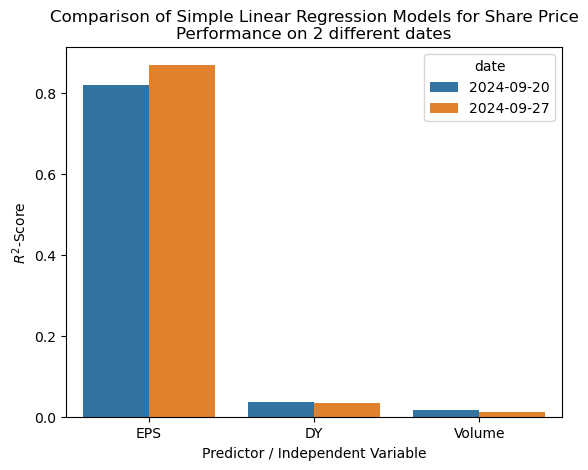

In [45]:
sns.barplot(data=model_perf_both_sets, x='model_name', y='r2_score', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.ylabel('$R^2$-Score')
plt.show()

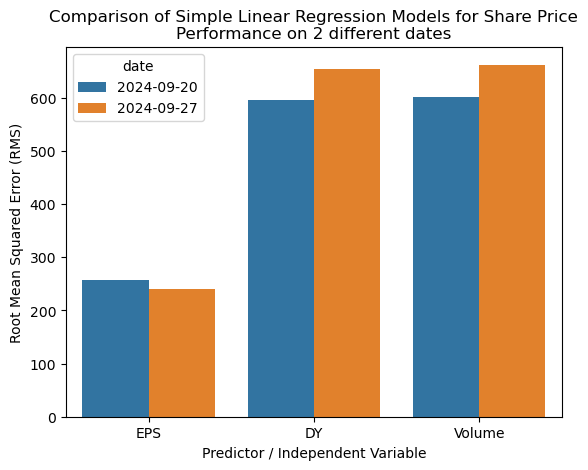

In [46]:
sns.barplot(data=model_perf_both_sets, x='model_name', y='RMS', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.ylabel('Root Mean Squared Error (RMS)')
plt.show()

## Using Several Predictors: Multiple Linear Regression
We might well assume that the share price of a company depends not only on one attribute, but on several ones. We can easily expand the linear regression model to a multiple linear model which uses several attributes to predict the share price. All we need to do is to select several columns - the `LinearRegression` model will then determine the right number of parameters for us:

In [47]:
linreg_sp_vs_3 = LinearRegression()
linreg_sp_vs_3.fit(largeCaps_val_b5k[['EPS_CHF', 'Volume_Shares', 'DivYield_Prct']], largeCaps_val_b5k['SharePrice_CHF'])

model_perf_sp_vs_3 = apply_eval_model(linreg_sp_vs_3, 
                                      largeCaps_b5k[['EPS_CHF', 'Volume_Shares', 'DivYield_Prct']],
                                      largeCaps_b5k['SharePrice_CHF'], 
                                      'EPS, Vol, DY')

model_perf_val_sp_vs_3 = apply_eval_model(linreg_sp_vs_3, 
                                          largeCaps_val_b5k[['EPS_CHF', 'Volume_Shares', 'DivYield_Prct']],
                                          largeCaps_val_b5k['SharePrice_CHF'], 
                                          'EPS, Vol, DY')

r2-Score: 0.7776013979933015
MSE: 82208.1607283759
RMSE: 286.7196552878367
r2-Score: 0.9270940234373221
MSE: 32377.091858052696
RMSE: 179.93635502047022


Below we add the new model to the model performance dataframe and render the same plots again:

In [48]:
model_perf_sp_vs_3['date'] = '2024-09-20'
model_perf_val_sp_vs_3['date'] = '2024-09-27'

model_perf_both_sets = pd.concat([model_perf_both_sets, model_perf_sp_vs_3, model_perf_val_sp_vs_3])

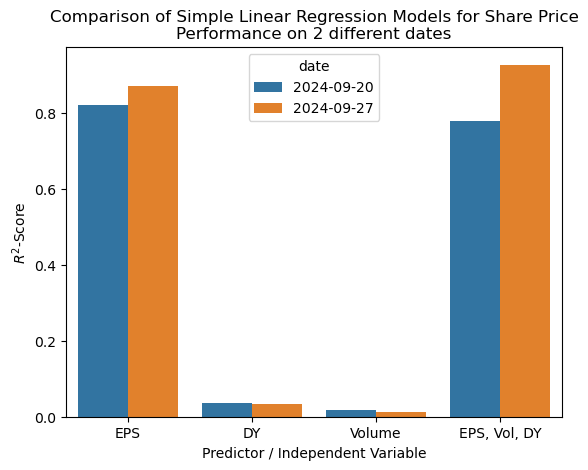

In [49]:
sns.barplot(data=model_perf_both_sets, x='model_name', y='r2_score', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.ylabel('$R^2$-Score')
plt.show()

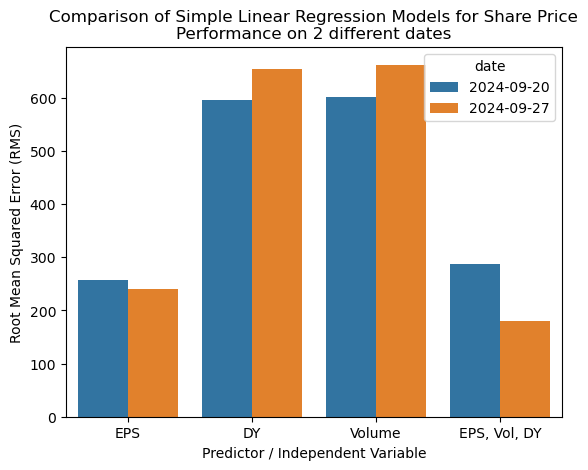

In [50]:
sns.barplot(data=model_perf_both_sets, x='model_name', y='RMS', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.ylabel('Root Mean Squared Error (RMS)')
plt.show()

## Log-Transformation and Share-Price Prediction
In this section we will do the log-transformation of the features (EPS, Volume, and Dividend Yield) and the target variable, and then define a linear regression to predict the log-transformed share price. As a first step, we calculate the logaritms:

In [51]:
# Apply Log-transformation to training data
largeCaps_b5k['log_SharePrice_CHF'] = np.log(largeCaps_b5k['SharePrice_CHF'])
largeCaps_b5k['log_EPS_CHF'] = np.log(largeCaps_b5k['EPS_CHF'])
largeCaps_b5k['log_Volume_Shares'] = np.log(largeCaps_b5k['Volume_Shares'])
largeCaps_b5k['log_DivYield_Prct'] = np.log(largeCaps_b5k['DivYield_Prct'])

**EXERCISE**: Do the log-transformation on the three predictors and the target variable (share price) also for the validation data. Then define and train regression models on the log-transformed features. Evaluate their performance on the later data.

In [52]:
# Apply Log-transformation to validation data
# largeCaps_val_b5k['log_SharePrice_CHF'] ...
# ...

In [53]:
## A linear Model to Predict the log Share Price from log EPS
# Model definition:
# linreg_lsp_vs_leps = ...

# Model Fitting:
# linreg_lsp_vs_leps.fit( ...)

# Evaluation on Training Data:
# model_perf_lsp_vs_leps = ...

# Evaluation on Test Data:
# model_perf_val_lsp_vs_leps = ... 

In [54]:
# define and evaluate further models 

**SOLUTION**: As first step, we do a log-transformation of the four attributes `SharePrice_CHF`, `EPS_CHF`, `Volume_Shares` and `DivYield_Prct`. Note that our data only contains companies for which all these values are larger than 0. In particular, we only have companies that pay out a dividend (hence `DivYield_Prct`>0) and that were profitable (hence `EPS_CHF`>0); so no filtering is needed.

In [55]:
largeCaps_val_b5k['log_SharePrice_CHF'] = np.log(largeCaps_val_b5k['SharePrice_CHF'])
largeCaps_val_b5k['log_EPS_CHF'] = np.log(largeCaps_val_b5k['EPS_CHF'])
largeCaps_val_b5k['log_Volume_Shares'] = np.log(largeCaps_val_b5k['Volume_Shares'])
largeCaps_val_b5k['log_DivYield_Prct'] = np.log(largeCaps_val_b5k['DivYield_Prct'])

Next, we define the individual models. We keep the naming convention as above, and add an `l` whenever the logarithm of the attribute is used.

In [56]:
## A linear Model to Predict the log Share Price from log EPS
# Model definition:
linreg_lsp_vs_leps = LinearRegression()

# Model Fitting:
linreg_lsp_vs_leps.fit(largeCaps_b5k[['log_EPS_CHF']], largeCaps_b5k[['log_SharePrice_CHF']])

# Evaluation on Validation Data:
print('Performance on Training Data:')
model_perf_lsp_vs_leps = apply_eval_model(linreg_lsp_vs_leps, largeCaps_b5k[['log_EPS_CHF']], 
                                          largeCaps_b5k[['log_SharePrice_CHF']], 'log EPS')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_lsp_vs_leps = apply_eval_model(linreg_lsp_vs_leps, largeCaps_val_b5k[['log_EPS_CHF']],
                                              largeCaps_val_b5k['log_SharePrice_CHF'], 'log EPS')

Performance on Training Data:
r2-Score: 0.7861919463881257
MSE: 0.30482490577175064
RMSE: 0.5521095052358279

Performance on Validation Data:
r2-Score: 0.7904614240190977
MSE: 0.28981958987792605
RMSE: 0.5383489480605735


In [57]:
## A linear Model to Predict the log Share Price from log Dividend Yield
# Model definition:
linreg_lsp_vs_ldy = LinearRegression()

# Model Fitting:
linreg_lsp_vs_ldy.fit(largeCaps_b5k[['log_DivYield_Prct']], largeCaps_b5k[['log_SharePrice_CHF']])

# Evaluation on Training Data:
print('Performance on Training Data:')
model_perf_lsp_vs_ldy = apply_eval_model(linreg_lsp_vs_ldy, largeCaps_b5k[['log_DivYield_Prct']], 
                                         largeCaps_b5k[['log_SharePrice_CHF']], 'log Div Yield')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_lsp_vs_ldy = apply_eval_model(linreg_lsp_vs_ldy, largeCaps_val_b5k[['log_DivYield_Prct']], 
                                             largeCaps_val_b5k[['log_SharePrice_CHF']], 'log Div Yield')

Performance on Training Data:
r2-Score: 0.05522967534255219
MSE: 1.346953589093702
RMSE: 1.1605832969217256

Performance on Validation Data:
r2-Score: 0.06918183114318632
MSE: 1.2874447518131036
RMSE: 1.1346562262699234


In [58]:
## A linear Model to Predict the Share Price from Volume
# Model definition:
linreg_lsp_vs_lvs = LinearRegression()

# Model Fitting:
linreg_lsp_vs_lvs.fit(largeCaps_b5k[['log_Volume_Shares']], largeCaps_b5k[['log_SharePrice_CHF']])

# Evaluation on Training Data:
print('Performance on Training Data:')
model_perf_lsp_vs_lvs = apply_eval_model(linreg_lsp_vs_lvs, largeCaps_b5k[['log_Volume_Shares']], 
                                         largeCaps_b5k[['log_SharePrice_CHF']], 'log Volume')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_lsp_vs_lvs = apply_eval_model(linreg_lsp_vs_lvs, largeCaps_val_b5k[['log_Volume_Shares']], 
                                             largeCaps_val_b5k[['log_SharePrice_CHF']], 'log Volume')

Performance on Training Data:
r2-Score: 0.23265442891860222
MSE: 1.0940001438106106
RMSE: 1.0459446179461944

Performance on Validation Data:
r2-Score: 0.21374455112213553
MSE: 1.0874953724694398
RMSE: 1.0428304619972701


We also add a logarithm version to the model with the same three most correlated attributes:

In [59]:
## A multiple linear Model to Predict the log Share Price from log EPS, log Volume and log Dividend Yield
# Model definition:
linreg_lsp_vs_l3 = LinearRegression()

# Model Fitting:
linreg_lsp_vs_l3.fit(largeCaps_b5k[['log_EPS_CHF', 'log_Volume_Shares', 'log_DivYield_Prct']], largeCaps_b5k['log_SharePrice_CHF'])

# Evaluation on Training Data:
print('Performance on Training Data:')
model_perf_lsp_vs_l3 = apply_eval_model(linreg_lsp_vs_l3, largeCaps_b5k[['log_EPS_CHF', 'log_Volume_Shares', 'log_DivYield_Prct']], 
                                        largeCaps_b5k['log_SharePrice_CHF'], 'log EPS, Vol, DY')

# Evaluation on Validation Data:
print('\nPerformance on Validation Data:')
model_perf_val_lsp_vs_l3 = apply_eval_model(linreg_lsp_vs_l3, largeCaps_val_b5k[['log_EPS_CHF', 'log_Volume_Shares', 'log_DivYield_Prct']], 
                                            largeCaps_val_b5k['log_SharePrice_CHF'], 'log EPS, Vol, DY')

Performance on Training Data:
r2-Score: 0.8778053009433949
MSE: 0.17421227590123106
RMSE: 0.4173874409960499

Performance on Validation Data:
r2-Score: 0.8781196850220557
MSE: 0.1685766104677532
RMSE: 0.4105808208717904


**(END OF SOLUTION)**

Next, we merge the evaluation results for the different models. We do that separately for the training and the test data.

**NOTE**: If you choose a different naming convention, you might have to adapt the code here:

In [60]:
model_perf_all_log = pd.concat([model_perf_lsp_vs_leps, model_perf_lsp_vs_ldy, model_perf_lsp_vs_lvs, model_perf_lsp_vs_l3])
model_perf_all_log['date'] = '2024-09-20'

model_perf_val_all_log = pd.concat([model_perf_val_lsp_vs_leps, model_perf_val_lsp_vs_ldy, model_perf_val_lsp_vs_lvs, model_perf_val_lsp_vs_l3])
model_perf_val_all_log['date'] = '2024-09-27'

model_perf_both_sets_linlog = pd.concat([model_perf_both_sets, model_perf_all_log, model_perf_val_all_log])

Now we can plot the performance bar charts including the models with the logarithm transform:

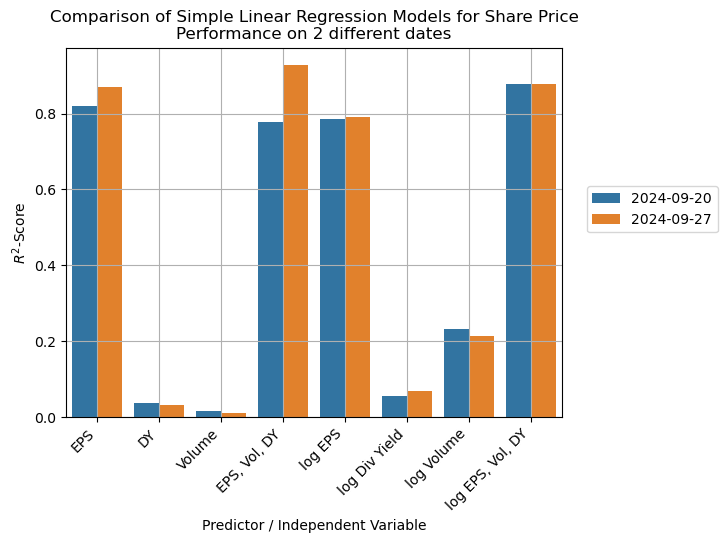

In [61]:
sns.barplot(data=model_perf_both_sets_linlog, x='model_name', y='r2_score', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.xticks(rotation=45, ha='right')
plt.ylabel('$R^2$-Score')
plt.legend(loc=(1.05, 0.5))
plt.grid()
plt.show()

**EXERCISE**: How to interpret these results?

**SOLUTION**: 

* The models based on  `EPS` and `log_EPS` are  comparable in their performance.
* For the dividend yield, the logarithmic `log_DY` seems to yield a better prediction than the linear value `DY`, although both yield poor results.
* For the volume, the model based on  `log_Volume` seems to be largely overfitting and yields a much better performance on the training data, however a comparably poor performance on the test data as the linear model.
* For the model based on the three most-correlated features, we see that the model based on the logarithmic values is the best of all considered models and yields a slightly better performance on both the training and the test data than the model on the linear values.
* Note that here, we are comparing models where the output (and hence also the residuals and prediction errors) are on different scales. As the R2-score is independent of this scale, it can still be used for a valid comparison, while a plot of the different RMS values of the models based on the linear and the logarithmic values would therefore be useless.

**(END OF SOLUTION)**

## Shrinkage Model for Share Price Prediction
In this exercise, you will apply the lasso shrinkage method to identify the attributes most relevant to predict the share price. If you run this notebook in the given order, the logarithm of the 3 most correlated features are included in addition to the linear values.

Before we can start with the actual shrinkage, we have to scale the features:

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, lasso_path
from sklearn.model_selection import GridSearchCV

**Note**: Depending on the hyperparameters and the data, the lasso optimization might not converge. In this case, you would get a convergence warning (something like `ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.297e+10, tolerance: 5.518e+07`, with numbers potentially different). This means that the optimization algorithm did not find a good solution. As mentioned in the warning message, a higher regularization can help here. As we are searching for the best hyperparameter, we can assume that the candidate values for which these messages occurr are not yielding a good results and will therefore be discarded. To avoid cluttering of the output, we switch off the display of convergence warnings with the cell below:

In [63]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

As the scaling is only possible for numerical attributes, we first drop the three non-numerical attributes and store the results as `largeCaps_b5k_num`. Then we can define, fit and apply the scaler. We do this for both the first and the second data set.

In [64]:
largeCaps_b5k_num = largeCaps_b5k.drop(['Symbol', 'Name', 'Sector'], axis=1)
largeCaps_b5k_num = largeCaps_b5k_num.dropna()
predictors = largeCaps_b5k_num.drop(['log_SharePrice_CHF', 'SharePrice_CHF'], axis=1)
target = largeCaps_b5k_num['SharePrice_CHF']

Next, we scale the predictors:

In [65]:
# initialize and adapt scaler
share_scaler = StandardScaler()
share_scaler = share_scaler.fit(predictors)

# apply scaling to predictors
predictors_std = share_scaler.transform(predictors)
predictors_std = pd.DataFrame(predictors_std, columns = predictors.columns)

**EXERCISE**: Use shrinkage to identify the best predictors for the share price.

**SOLUTION:**

In [66]:
model = Lasso(random_state = 0)

In [67]:
alpha_range = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]

In [68]:
grid_search_mse = GridSearchCV(model, param_grid={'alpha':alpha_range}, scoring ='neg_mean_squared_error', cv=5)
grid_search_mse.fit(predictors_std, target)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5,
                                   10]},
             scoring='neg_mean_squared_error')

In [69]:
print('Scoring MSE')
print('Best MSE score   : ', -grid_search_mse.best_score_)
print('Best parameters  : ',  grid_search_mse.best_params_)

Scoring MSE
Best MSE score   :  39649.90144024731
Best parameters  :  {'alpha': 2}


As the best parameter values is the lowest we have investigated, we expand the range of possible values, and choose a few values closer to it:

In [70]:
alpha_range = [0.001, 0.002, 0.005, 0.08, 0.01, 0.015, 0.02, 0.05, 0.1]
grid_search_mse = GridSearchCV(model, param_grid={'alpha':alpha_range}, scoring ='neg_mean_squared_error', cv=5, )
grid_search_mse.fit(predictors_std, target)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.001, 0.002, 0.005, 0.08, 0.01, 0.015, 0.02,
                                   0.05, 0.1]},
             scoring='neg_mean_squared_error')

**Note**: You might get a convergence warning (something like `ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.297e+10, tolerance: 5.518e+07`, with numbers potentially different). This means that the optimization algorithm did not find a good solution. As mentioned in the warning message, a higher regularization can help here. As we are searching for the best hyperparameter, we can assume that the candidate values for which these messages occurr are not yielding a good results and will therefore be discarded. 

We can now look at all the CV results, and in particular identify the best value of the hyperparameter:

In [71]:
grid_search_mse.cv_results_

{'mean_fit_time': array([0.00625172, 0.00332761, 0.00612783, 0.00937581, 0.00632844,
        0.01562738, 0.00260282, 0.00624995, 0.00695043]),
 'std_fit_time': array([0.00765676, 0.00665522, 0.00750764, 0.00765532, 0.00590209,
        0.00988122, 0.00520563, 0.0076546 , 0.0085842 ]),
 'mean_score_time': array([0.        , 0.00312457, 0.        , 0.        , 0.        ,
        0.        , 0.00372829, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.00624914, 0.        , 0.        , 0.        ,
        0.        , 0.00606566, 0.        , 0.        ]),
 'param_alpha': masked_array(data=[0.001, 0.002, 0.005, 0.08, 0.01, 0.015, 0.02, 0.05,
                    0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.002},
  {'alpha': 0.005},
  {'alpha': 0.08},
  {'alpha': 0.01},
  {'alpha': 0.015},
  {'alpha': 0.02},
  {'alpha'

In [72]:
print('Scoring MSE')
print('Best MSE score   : ', -grid_search_mse.best_score_)
print('Best parameters  : ',  grid_search_mse.best_params_)

Scoring MSE
Best MSE score   :  163582.82929532492
Best parameters  :  {'alpha': 0.1}


**END OF SOLUTION**

Let us now evaluate the model on the training data:

In [73]:
# define lasso model based on best value for alpha
lasso_model_mse = Lasso(alpha=grid_search_mse.best_params_['alpha'])

# train model
lasso_model_mse.fit(predictors_std, target)

# Evaluation on Training Data:
model_perf_lasso = apply_eval_model(lasso_model_mse, predictors_std, target, 'lasso')

r2-Score: 0.9568570458734225
MSE: 18756.91229257142
RMSE: 136.95587717426156


Again, we want to evaluate this new model on the later data set to see how well this model works on a new data set.

**EXERCISE:** Apply the new model to the later data set `largeCaps_val_b5k`. In order to get a valid result, you have to apply the exact same pre-processing steps as we did to the training data.

In [74]:
# largeCaps_val_b5k_num = ...

# predictors_val = ...
# target_val = ...

# ... 

In [75]:
# Evaluation on Test Data:
# model_perf_val_lasso = ...

**SOLUTION**

In [76]:
largeCaps_val_b5k_num = largeCaps_val_b5k.drop(['Symbol', 'Name', 'Sector'], axis=1)

predictors_val = largeCaps_val_b5k_num.drop(['log_SharePrice_CHF', 'SharePrice_CHF'], axis=1)
target_val = largeCaps_val_b5k_num['SharePrice_CHF']

predictors_val_std = share_scaler.transform(predictors_val)
predictors_val_std = pd.DataFrame(predictors_val_std, columns = predictors_val.columns)

In [77]:
# Evaluation on Validation Data:
model_perf_val_lasso = apply_eval_model(lasso_model_mse, predictors_val_std, target_val, 'lasso')

r2-Score: 0.9462016777860085
MSE: 23891.501112176316
RMSE: 154.56875852570053


**(END OF SOLUTION)**

Again we merge the results for a graphical representation:

In [78]:
# Merging the result data frames:
model_perf_lasso['date'] = '2024-09-20'
model_perf_val_lasso['date'] = '2024-09-27'

model_perf_all = pd.concat([model_perf_both_sets_linlog, model_perf_lasso, model_perf_val_lasso])

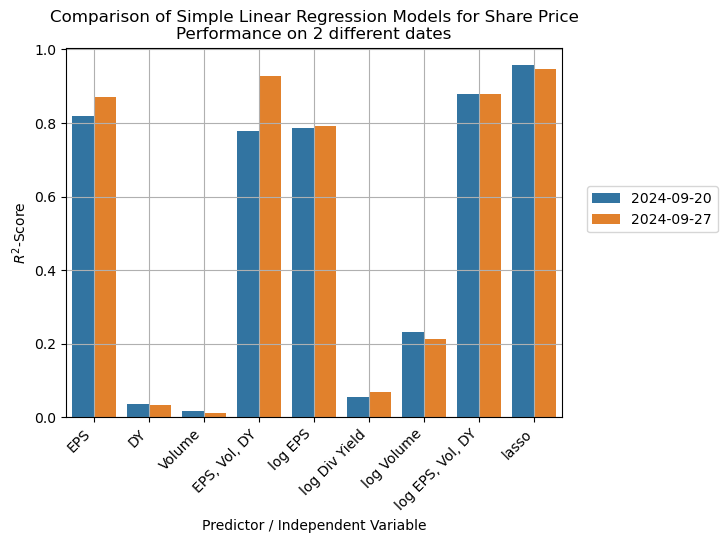

In [79]:
sns.barplot(data=model_perf_all, x='model_name', y='r2_score', hue = 'date')
plt.title('Comparison of Simple Linear Regression Models for Share Price\nPerformance on 2 different dates')
plt.xlabel('Predictor / Independent Variable')
plt.xticks(rotation=45, ha='right')
plt.ylabel('$R^2$-Score')
plt.legend(loc=(1.05, 0.5))
plt.grid()
plt.show()

**EXERCISE:** Among the models listed above, which one do you choose to automatically predict the share price? What steps would be necessary to give a dependable estimate of the model performance on new data (you don't have to program it)? Explain why this step is necessary.

**SOLUTION**: We will use the `model_perf_all` which was built up above to identify the most promissing model. As we want to find out which model performs best on **new** data, we have to look at the performance on the later dataset (i.e., our validation data set). The following code does this for us:

In [80]:
model_perf_all[ model_perf_all['date'] == '2024-09-20' ].sort_values(by=['RMS'])

,model_name,r2_score,MSE,RMS,date
"log EPS, Vol, DY","log EPS, Vol, DY",0.877805,0.174212,0.417387,2024-09-20
log EPS,log EPS,0.786192,0.304825,0.552110,2024-09-20
log Volume,log Volume,0.232654,1.094000,1.045945,2024-09-20
log Div Yield,log Div Yield,0.055230,1.346954,1.160583,2024-09-20
lasso,lasso,0.956857,18756.912293,136.955877,2024-09-20
EPS,EPS,0.819774,66619.382398,258.107308,2024-09-20
"EPS, Vol, DY","EPS, Vol, DY",0.777601,82208.160728,286.719655,2024-09-20
DY,DY,0.037397,355819.753915,596.506290,2024-09-20
Volume,Volume,0.017131,363310.918486,602.752784,2024-09-20


Note that the list also contains some models that predict the log share price. As the RMS (root mean squared error) depends on the scale of the original data, this is not a fair comparison. 

When restricting ourselves to the models that predict the Shareprice (rather than the log-Shareprice), we see that the lasso model is the best performing model.

We might also look at the R2-Score:

In [81]:
model_perf_all[ model_perf_all['date'] == '2024-09-27' ].sort_values(by=['r2_score'])

,model_name,r2_score,MSE,RMS,date
Volume,Volume,0.011265,439091.196903,662.639568,2024-09-27
DY,DY,0.033225,429338.943437,655.239608,2024-09-27
log Div Yield,log Div Yield,0.069182,1.287445,1.134656,2024-09-27
log Volume,log Volume,0.213745,1.087495,1.042830,2024-09-27
log EPS,log EPS,0.790461,0.289820,0.538349,2024-09-27
EPS,EPS,0.870147,57666.925009,240.139387,2024-09-27
"log EPS, Vol, DY","log EPS, Vol, DY",0.878120,0.168577,0.410581,2024-09-27
"EPS, Vol, DY","EPS, Vol, DY",0.927094,32377.091858,179.936355,2024-09-27
lasso,lasso,0.946202,23891.501112,154.568759,2024-09-27


As the R2-Score does not depend on the scale of the original data, we can actually compare both types of models with each other.

We see that the log-Shareprice prediction with a multiple linear regression based on the logarithm of the EPS, Volumne and Dividend yield is the best-performing of all models we considered. The lasso model (based on all features) is the best model to predict the share price. In this sense, we can conclude that the log-transformation has led the path to better-performing models. For this project, however, we keep the focus on the linear prediction (i.e., without the log transformation).

To predict the models performance on new data, we have to use yet another new dataset - for this, we have drawn a third dataset from October 2. To run the analysis, we have to do the exact same pre-processing steps as we have done for the other two datasets. Similar to what we did for the validation data set, we will append `_test` to all variables related to this dataset.

In [82]:
# data loading
largeCaps_test = pd.read_csv('large_caps_CH_2024-10-02.csv')

# filter out companies with no dividend yield, or negative EPS
largeCaps_test = largeCaps_test.loc[(largeCaps_test['DivYield_Prct']>0) & (largeCaps_test['EPS_CHF']>0)]

# filter out companies with shares costing 5'000 CHF or more
largeCaps_test_b5k = largeCaps_test.loc[largeCaps_test['SharePrice_CHF']<5_000, ]

In [83]:
# calculate the logarithm of the features
# this is merely done for consistency (we don't need the features here).
# However, the scaler is adapted to data frames containing also the log-values as used above,
# and would complain if we would apply it to a that does not contain the exact same attributes.
largeCaps_test_b5k['log_SharePrice_CHF'] = np.log(largeCaps_test_b5k['SharePrice_CHF'])
largeCaps_test_b5k['log_EPS_CHF'] = np.log(largeCaps_test_b5k['EPS_CHF'])
largeCaps_test_b5k['log_Volume_Shares'] = np.log(largeCaps_test_b5k['Volume_Shares'])
largeCaps_test_b5k['log_DivYield_Prct'] = np.log(largeCaps_test_b5k['DivYield_Prct'])

In [84]:
# drop non-numerical values
largeCaps_test_b5k_num = largeCaps_test_b5k.drop(['Symbol', 'Name', 'Sector'], axis=1)
largeCaps_test_b5k_num = largeCaps_test_b5k_num.dropna()

# select predictors and target variable:
predictors_test = largeCaps_test_b5k_num.drop(['log_SharePrice_CHF', 'SharePrice_CHF'], axis=1)
target_test = largeCaps_test_b5k_num['SharePrice_CHF']

# apply scaling, and build a data frame out of the scaled values
predictors_test_std = share_scaler.transform(predictors_test)
predictors_test_std = pd.DataFrame(predictors_test_std, columns = predictors_test.columns)

In [85]:
# Evaluation model on Test Data:
model_perf_test_lasso = apply_eval_model(lasso_model_mse, predictors_test_std, target_test, 'lasso')

r2-Score: 0.9462685180399699
MSE: 23239.149464317805
RMSE: 152.44392235939682


The performance of the lasso model is very similar to the one that we have seen on the validation data, i.e., we did not do any overfitting.

**(END OF SOLUTION)**